## Neural Networks
Neural networks are computational model inspired by human brains, designed to learn from data and make predictionns or decisions

Let's start with generating Synthetic data, we don't need to bother about the meaningfullness of data as the aim of this notebook is to teach about the Maths behind the neural networks
## 🧪 **Step 1: Synthetic Data (Matrix Format)**  
*Why synthetic data?*  
- Focus purely on math → No messy real-world distractions.  
- Tiny dataset → **Hand-calculate** every step later.  

### **Dataset**  
| Sample | Feature 1 | Feature 2 |  Label   |
|--------|-----------|-----------|----------|
| 1      | 0.5       | 1.5       |    0     |
| 2      | 1.0       | 2.0       |    0     |
| 3      | 1.5       | 0.5       |    1     |
| 4      | 2.0       | 3.0       |    1     |
| 5      | 3.0       | 1.0       |    1     |

**Matrix Notation**:  
$$
X = \begin{bmatrix}
0.5 & 1.5 \\
1.0 & 2.0 \\
1.5 & 0.5 \\
2.0 & 3.0 \\
3.0 & 1.0 \\
\end{bmatrix}, \quad
y = \begin{bmatrix}
0 \\
0 \\
1 \\
1 \\
1 \\
\end{bmatrix}
$$  

**Shape Matters**:  
- $X(features)$: 5 samples × 2 features → `(5, 2)`  
- $y(labels)$: 5 labels (binary: 0/1) → `(5,)`  

let's hypothetically assume that feature 1 is IQ level of a student, feature 2 is their GPA and label tells whether a student is intelligent or not say 0 for not intelligent and 1 for intelligent.


In [2]:
import numpy as np

# Generate synthetic data
X = np.array([[0.5, 1.5],
              [1.0, 2.0],
              [1.5, 0.5],
              [2.0, 3.0],
              [3.0, 1.0]])
y = np.array([0, 0, 1, 1, 1])

print("X:\n", X)
print("\ny:", y)
print("\nShapes -> X:", X.shape, " y:", y.shape)

X:
 [[0.5 1.5]
 [1.  2. ]
 [1.5 0.5]
 [2.  3. ]
 [3.  1. ]]

y: [0 0 1 1 1]

Shapes -> X: (5, 2)  y: (5,)


## 🧮 **Step 2: Initialize Parameters - The Network's Starting point**

### **Why Weights/Biases?**
- **Weights (W)**: Decide how features (IQ/GPA) interact to predict labels (intelligence).
- **Bias (b)**: Allows shifting predictions even when features are zero.

### **Matrix Architecture**
For a simple 2-layer network (2 features → 3 hidden neurons → 1 output):

**Weight Matrices**:
$$
W1 = \begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
\end{bmatrix}, \quad
W2 = \begin{bmatrix}
w_{1} \\
w_{2} \\
w_{3} \\
\end{bmatrix}
$$

**Bias Vectors**:
$$
b1 = \begin{bmatrix}
b_{1} & b_{2} & b_{3} \\
\end{bmatrix}, \quad
b2 = \begin{bmatrix}
b \\
\end{bmatrix}
$$

**Shapes**:
- $W1$: `(2, 3)` (2 input features × 3 hidden neurons)
- $W2$: `(3, 1)` (3 hidden neurons × 1 output)
- $b1$: `(1, 3)`, $b2$: `(1, 1)`

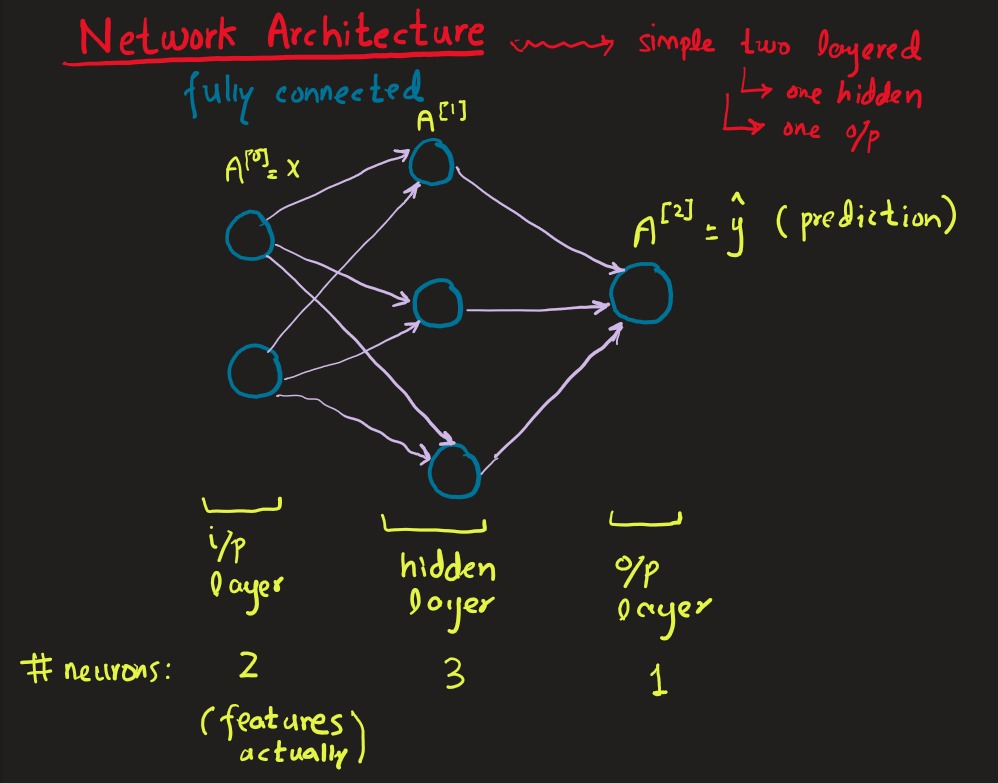

## 📐 **General Rule for Weight & Bias Shapes in Any Layer**

For any layer **L** in a fully connected neural network:

### **Weights**:
$$
W^{[L]}.shape = (n^{[L]}, n^{[L-1]})
$$
- **Where**:
  - $n^{[L]}$ = Number of neurons in layer **L**
  - $n^{[L-1]}$ = Number of neurons in previous layer **L-1**

### **Biases**:
$$
b^{[L]}.shape = (n^{[L]}, 1)
$$

Why shapes are like this , it will become clearer in Forward Propagation step

In [3]:
def initialize_parameters():
    np.random.seed(42)  # For reproducibility
    W1 = np.random.randn(2, 3) * 0.01  # Small random values
    b1 = np.zeros((1, 3))
    W2 = np.random.randn(3, 1) * 0.01
    b2 = np.zeros((1, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}   #returns a dictionary with key as weight#layer etc

parameters = initialize_parameters()
print("W1:\n", parameters["W1"], "\n")
print("b1:", parameters["b1"], "\n")
print("W2:\n", parameters["W2"], "\n")
print("b2:", parameters["b2"])

W1:
 [[ 0.00496714 -0.00138264  0.00647689]
 [ 0.0152303  -0.00234153 -0.00234137]] 

b1: [[0. 0. 0.]] 

W2:
 [[ 0.01579213]
 [ 0.00767435]
 [-0.00469474]] 

b2: [[0.]]


Python Numpy automatically matches the shape of bias term so that it can be added with matrix multiplication result, this is called broadcasting

## ➡️ **Step 3: Forward Propagation**

### **What Happens?**
- Data flows through the network layer-by-layer.
- **Hidden Layer**: ReLU activation (`max(0, x)`) introduces non-linearity.
- **Output Layer**: Sigmoid activation squashes predictions to `[0, 1]` (probabilities).


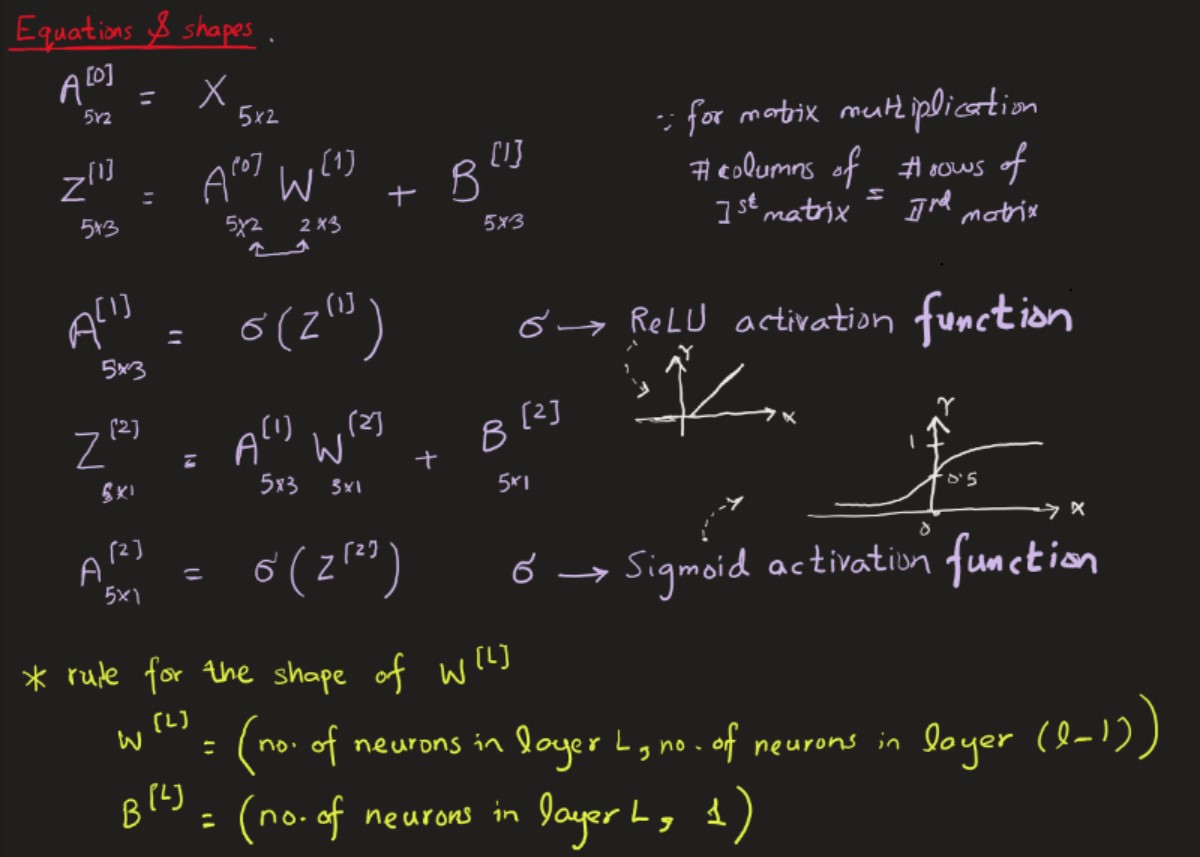

In [4]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_prop(X, parameters):
    # Retrieve parameters  from the parameters dictionary we created by the function intialize_parameters
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']

    # layer 1 calculations (ReLU activation)
    Z1 = np.dot(X, W1) + b1  # (5,2) * (2,3) = (5,3)
    A1 = relu(Z1)

    # layer 2 calculations (Sigmoid for final probability)
    Z2 = np.dot(A1, W2) + b2  # (5,3) * (3,1) = (5,1)
    A2 = sigmoid(Z2)

    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

forward_output = forward_prop(X, parameters)
print("Hidden Layer Output (A1):\n", forward_output["A1"])
print("\nFinal Predictions (A2):\n", forward_output["A2"])

Hidden Layer Output (A1):
 [[0.02532902 0.         0.        ]
 [0.03542774 0.         0.00179415]
 [0.01506586 0.         0.00854464]
 [0.05562518 0.         0.00592966]
 [0.03013172 0.         0.01708929]]

Final Predictions (A2):
 [[0.5001    ]
 [0.50013776]
 [0.50004945]
 [0.50021265]
 [0.5000989 ]]


## 📉 **Step 4: Loss Calculation - Measuring Prediction Errors**


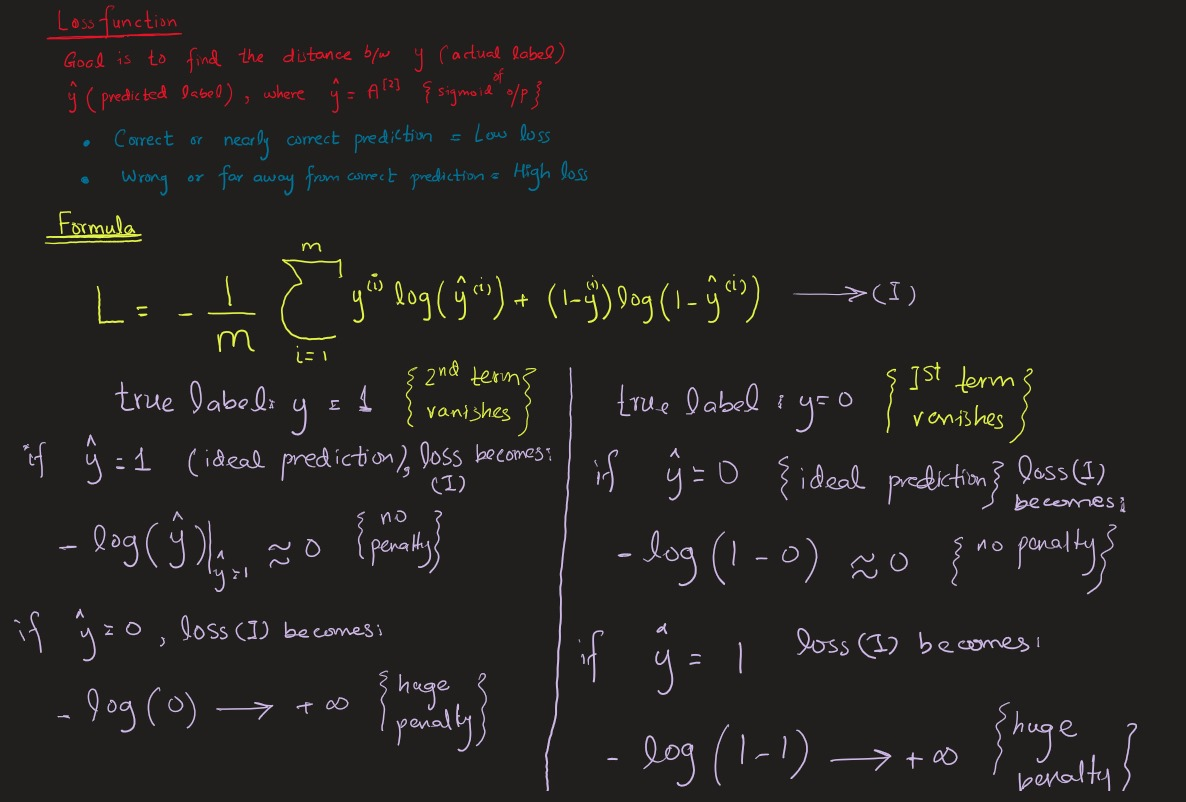

### **Why Log Loss?**  
Log loss (binary cross-entropy) aggressively penalizes confident but wrong predictions, making it ideal for probabilistic classification. Its logarithmic nature ensures large gradients for incorrect high-certainty predictions, driving faster corrections during training.

---

In [5]:
def binary_cross_entropy(y_hat, y):
    m = y.shape[0]  # Number of samples
    epsilon = 1e-10  # Avoid log(0)
    loss = - (1/m) * np.sum(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))
    return loss

## 🔙 **Step 5: Backward Propagation - Calculating Gradients**

BackPropagation is the heart of neural networks even the heart of modern AI chatbots like GPTs and more.

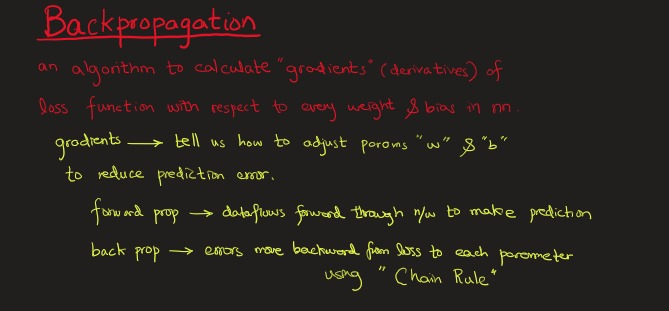

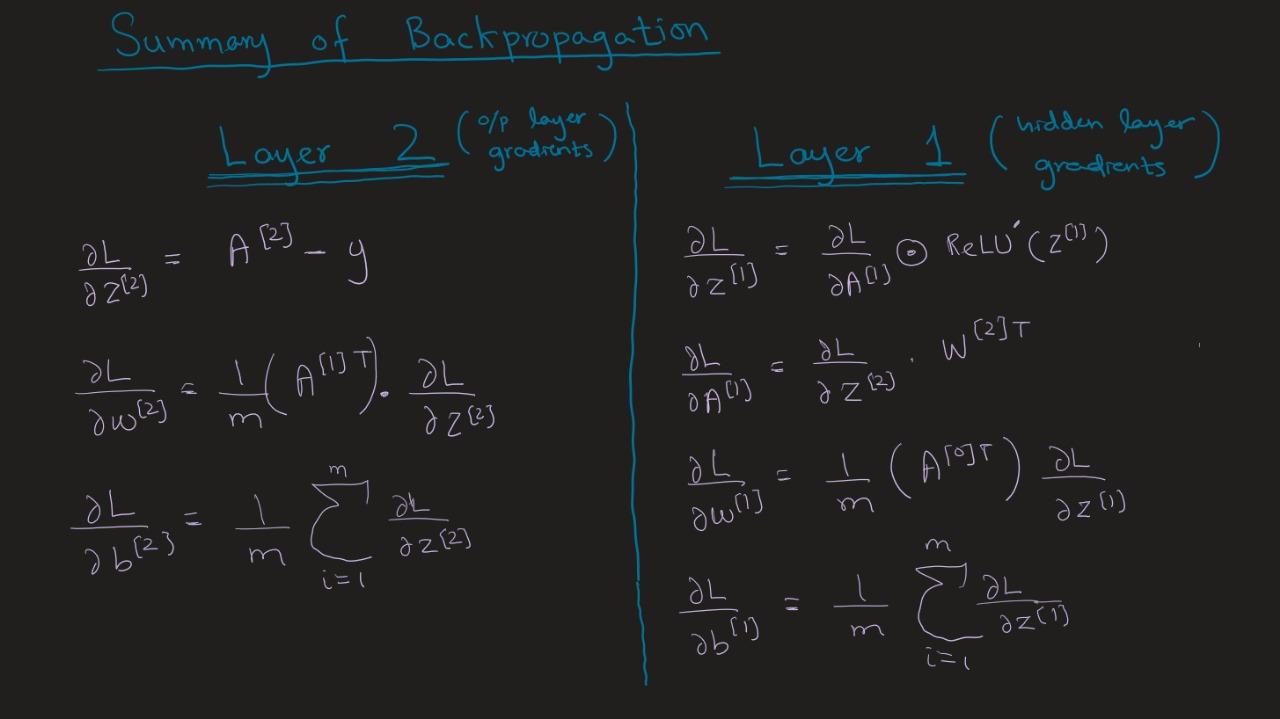

*(Shapes are aligned by matrix operations and transpose!)*

The chain rule plays a central role in backpropagation by enabling efficient gradient computation through the network layers.  
All backpropagation calculations were performed manually. For access, please contact via email.

In [6]:
def relu_derivative(x):
    return (x > 0).astype(float)

def backward_prop(X, y, forward_output, parameters):
    m = X.shape[0]
    A1 = forward_output["A1"]
    A2 = forward_output["A2"]
    Z1 = forward_output["Z1"]
    W2 = parameters["W2"]

    # Output layer gradients
    dZ2 = A2 - y.reshape(-1, 1)  # Shape: (5, 1)
    dW2 = (1/m) * np.dot(A1.T, dZ2)  # (3,5) * (5,1) = (3,1)
    db2 = (1/m) * np.sum(dZ2, axis=0)  # (1,1)

    # Hidden layer gradients
    dA1 = np.dot(dZ2, W2.T)  # (5,1) * (1,3) = (5,3)
    dZ1 = dA1 * relu_derivative(Z1)  # (5,3) ⊙ (5,3) = (5,3)
    dW1 = (1/m) * np.dot(X.T, dZ1)  # (2,5) * (5,3) = (2,3)
    db1 = (1/m) * np.sum(dZ1, axis=0)  # (1,3)

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

# Execute
gradients = backward_prop(X, y, forward_output, parameters)
print("dW2 (Output layer weight gradients):\n", gradients["dW2"])
print("\ndb2 (Output layer bias gradients):", gradients["db2"])
print("\ndW1 (Hidden layer weight gradients):\n", gradients["dW1"])
print("\ndb1 (Hidden layer bias gradients):", gradients["db1"])

dW2 (Output layer weight gradients):
 [[-0.00400201]
 [ 0.        ]
 [-0.00297622]]

db2 (Output layer bias gradients): [-0.09988025]

dW1 (Hidden layer weight gradients):
 [[-0.00789296  0.          0.00258123]
 [-0.00157546  0.          0.00117271]]

db1 (Hidden layer bias gradients): [-0.00157732  0.          0.00093848]



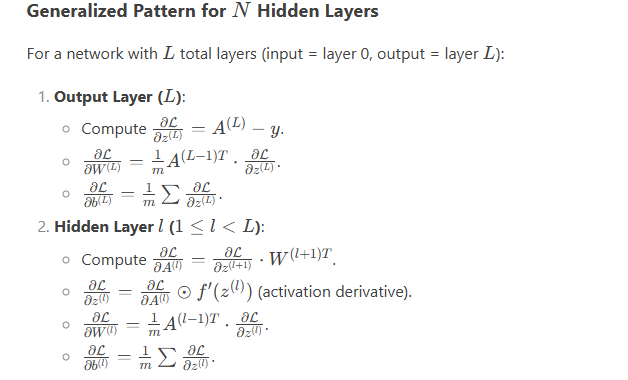

## 🌌 **Step 6: Gradient Descent - The Humble Compass of Machine Learning**  



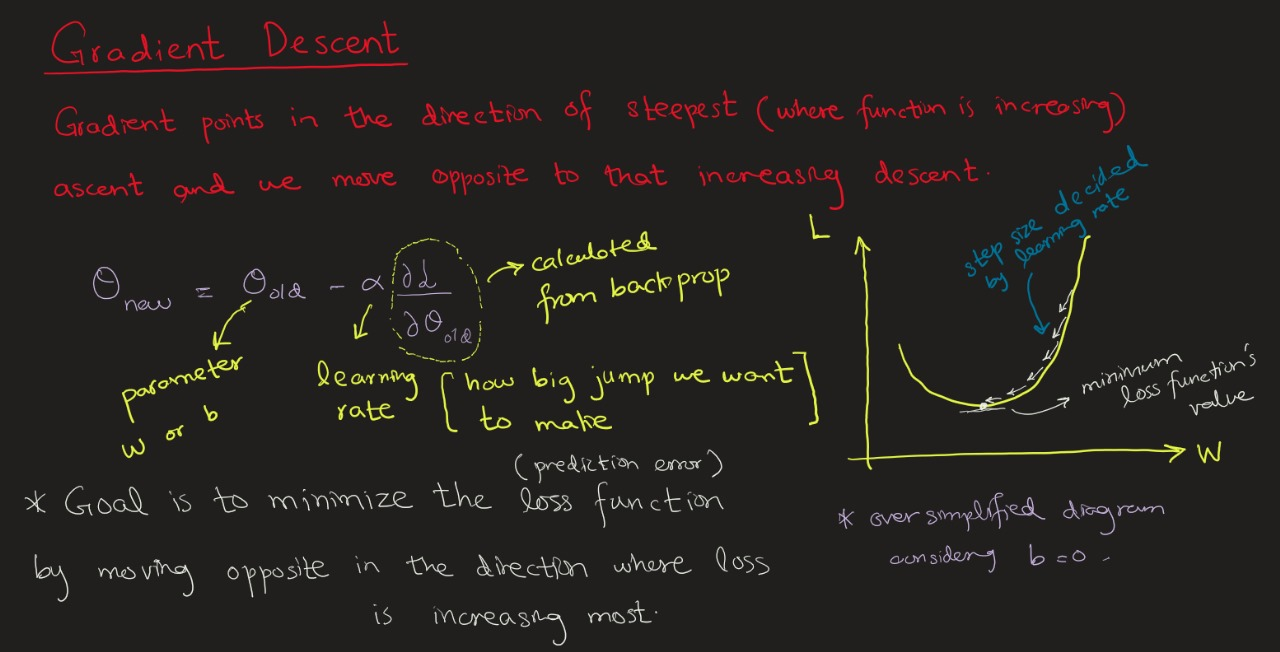

### **What It Does**  
Gradient descent guides the network’s parameters (weights/biases) toward better predictions by nudging them in the **direction of steepest loss reduction**, calculated via backpropagation.  

### **Mathematical Core**  
$$
\theta_{\text{new}} = \theta_{\text{old}} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial \theta}
$$  
- **$\theta$**: Parameters (weights/biases)  
- **$\alpha$**: Learning rate (step size)  
- **$\frac{\partial \mathcal{L}}{\partial \theta}$**: Gradient (error sensitivity)  

### **Why It’s Timeless**  
- **Simplicity**: Just **subtract gradients × learning rate**!  
- **Ubiquity**: Powers modern LLMs (GPT-4), vision models (ResNet), and more.  
- **Adaptability**: Works with advanced variants (Adam, RMSProp).

In [7]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    # Here both parameters and gradients are dictionaries
    # Update weights and biases for layer 1 (hidden layer)
    parameters["W1"] -= learning_rate * gradients["dW1"]
    parameters["b1"] -= learning_rate * gradients["db1"]

    # Update weights and biases for layer 2 (output layer)
    parameters["W2"] -= learning_rate * gradients["dW2"]
    parameters["b2"] -= learning_rate * gradients["db2"]

    return parameters

# Execute
updated_parameters = update_parameters(parameters, gradients, learning_rate=0.01)

print("Updated W1 (Hidden Layer Weights):\n", updated_parameters["W1"])
print("\nUpdated b1 (Hidden Layer Biases):\n", updated_parameters["b1"])
print("\nUpdated W2 (Output Layer Weights):\n", updated_parameters["W2"])
print("\nUpdated b2 (Output Layer Bias):\n", updated_parameters["b2"])

Updated W1 (Hidden Layer Weights):
 [[ 0.00504607 -0.00138264  0.00645107]
 [ 0.01524605 -0.00234153 -0.0023531 ]]

Updated b1 (Hidden Layer Biases):
 [[ 1.57732165e-05  0.00000000e+00 -9.38480453e-06]]

Updated W2 (Output Layer Weights):
 [[ 0.01583215]
 [ 0.00767435]
 [-0.00466498]]

Updated b2 (Output Layer Bias):
 [[0.0009988]]


## 🔄 **Step 7: Training Loop - Learning from Mistakes**  

**What We Do Here**:  
We teach the network to improve its predictions by repeating 3 steps over and over:  
1. **Guess**: Make predictions (`forward_prop`).  
2. **Check Error**: Calculate how wrong it is (`binary_cross_entropy`).  
3. **Learn**: Adjust weights/biases using gradients (`backward_prop` + `update_parameters`).  

**Key Terms**:  
- **Epoch**: One full pass through the data (we do this `750` times).  
- **Learning Rate**: Controls "how much" the network learns from each mistake (`0.01` here).  

**Output**:  
- `trained_params`: Smarter weights/biases after training.  
- `loss_history`: A diary of errors decreasing over time (proof of learning!).  

*Like practicing a skill repeatedly to get better!* 🎯  

In [8]:
def train_model(X, y, epochs, learning_rate=0.01, print_interval=100): #this function will train the network for a specified number of epochs

    parameters = initialize_parameters()
    loss_history = []

    for epoch in range(epochs):
        # Forward propagation
        forward_output = forward_prop(X, parameters)

        # Compute loss
        loss = binary_cross_entropy(forward_output["A2"], y)
        loss_history.append(loss)

        # Backward propagation
        gradients = backward_prop(X, y, forward_output, parameters)

        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        # Print loss at intervals
        if epoch % print_interval == 0:
            print(f"Epoch {epoch} | Loss: {loss:.4f}")

    print("Training complete!")
    return parameters, loss_history

# Execute training
trained_params, loss_history = train_model(X, y, epochs=750, learning_rate=0.01, print_interval=100)

Epoch 0 | Loss: 3.4655
Epoch 100 | Loss: 3.4260
Epoch 200 | Loss: 3.4019
Epoch 300 | Loss: 3.3871
Epoch 400 | Loss: 3.3778
Epoch 500 | Loss: 3.3718
Epoch 600 | Loss: 3.3679
Epoch 700 | Loss: 3.3661
Training complete!


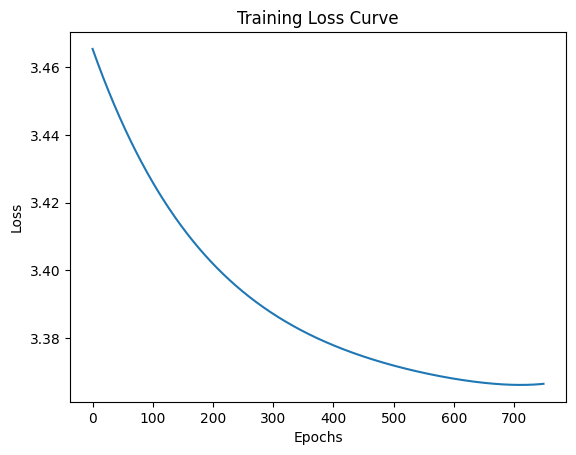

In [9]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()
#just to see what happens with loss as we train our network for desired number of epochs we can also choose the point where to
#stop training (early stopping) because after that performance of the network detiorates but downward slope curve shows that our
#loss funtion is decreasing and that's what we actually want

## 🧪 **Step 8: Validation - Testing the Network's "IQ"**  

**What We Do Here**:  
1. **Predict**: Use trained weights/biases to guess labels (`predict`).  
2. **Score**: Calculate accuracy – % of correct predictions (`compute_accuracy`).  
3. **Diagnose**: Confusion matrix shows *how* the model gets confused (optional).  

**Key Terms**:  
- **Threshold (0.5)**: Probabilities > 0.5 → class `1`, else `0`.  
- **Accuracy**: "Report card" for the model (100% = perfect score).  

**Why It Matters**:  
- Proof that training worked!  
- Reveals biases (e.g., always predicting `1`).  

*Like giving your network a final exam!* 📝

In [10]:
# CODE CELL: Model Validation - Predictions & Accuracy

def predict(X, parameters):
    """
    Generate class predictions (0 or 1) from trained parameters.
    """
    # Forward pass to get probabilities
    forward_output = forward_prop(X, parameters)
    y_hat_probs = forward_output["A2"]

    # Convert probabilities to binary predictions (threshold = 0.5)
    y_hat = (y_hat_probs > 0.5).astype(int).flatten()
    return y_hat, y_hat_probs

def compute_accuracy(y_true, y_pred):
    """
    Calculate accuracy percentage.
    """
    correct = np.sum(y_true == y_pred)
    return (correct / len(y_true)) * 100

# Generate predictions using trained parameters
y_pred, y_pred_probs = predict(X, trained_params)

# Calculate accuracy
accuracy = compute_accuracy(y, y_pred)

# Print results
print("True Labels     :", y)
print("Predicted Labels:", y_pred)
print("\nPrediction Probabilities:\n", y_pred_probs.round(3))
print(f"\nAccuracy: {accuracy:.2f}%")

# Optional: Confusion Matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

True Labels     : [0 0 1 1 1]
Predicted Labels: [1 1 1 1 1]

Prediction Probabilities:
 [[0.586]
 [0.592]
 [0.599]
 [0.606]
 [0.619]]

Accuracy: 60.00%

Confusion Matrix:
[[0 2]
 [0 3]]


The model predicts all samples as class `1` because:  
1. **Tiny Synthetic Data**: With only 5 samples, the network struggles to learn meaningful patterns.  
2. **Class Imbalance**: 3/5 samples are class `1`, so the model defaults to the majority class to minimize loss.  
3. **Random Features**: Synthetic features (IQ/GPA) have no real-world correlation with labels, making separation harder.  
4. **Training Limitations**: With limited epochs or small learning rates, weights may not adjust enough to distinguish classes.  

**This is common in small datasets** – the model "gives up" and predicts the dominant class. More data, longer training, or adjusted class weights would help!  

## 🧠 **Crux: The Universal Language of Neural Networks**  

Whether predicting 0/1 in a toy example or generating pixels in Stable Diffusion, **the same core math powers all neural networks**: matrix multiplications (linear transformations), gradient calculus (backpropagation), and probabilistic optimization (loss minimization). From perceptrons to GPT-4's transformers or DALL-E's diffusion models, complexity scales—but the foundational calculus of learning remains unchanged. AI's "magic" is universal mathematics in action.  